In [1]:
from scipy import *
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib import cm

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

from Lib.Parametrs import *
from Lib.Resonator import *


In [3]:
omega_d = 35.7e6
omega_q = 5.0e9

T1 = 5e-6 
gamma = 1/T1*2*np.pi
d2 = gamma*(3*hbar*c**3)/(4*omega_q**3)

def f_rho11(E, F):
    omega = F*2*np.pi
    Omega2 = E**2*d2/hbar
    delta = (omega_q*2*np.pi - omega)
    rho11 = Omega2/(2*Omega2+gamma**2+4*delta**2)
    return rho11

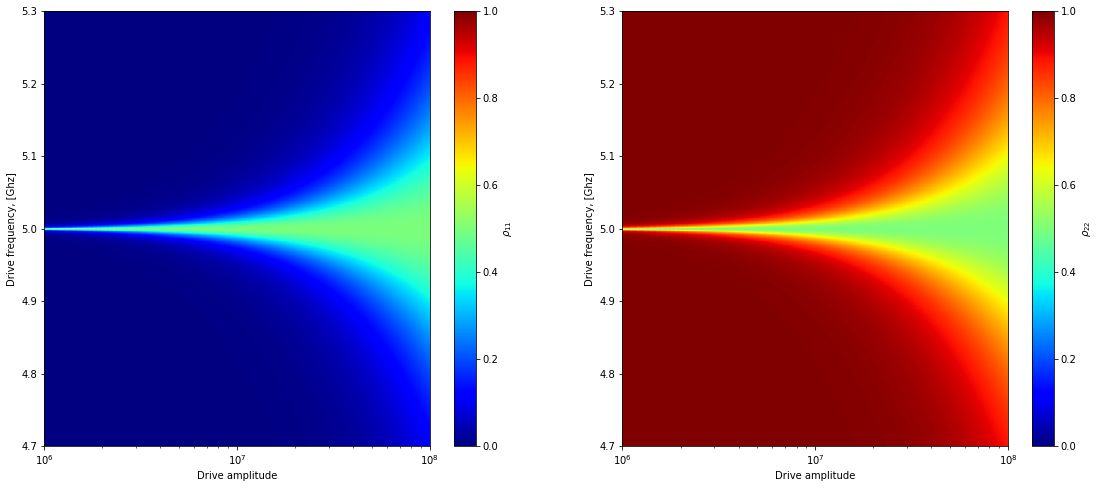

In [4]:
n = 1000

Ampl = np.linspace(1e6, 1e8, n)
Frequency = np.linspace(omega_q - 0.3e9, omega_q + 0.3e9, n)


XX, YY = np.meshgrid(Ampl, Frequency)
Rho11 = np.abs(f_rho11(XX,YY))
Rho22 = 1-Rho11


fig, ax = plt.subplots(1,2)
fig.set_figwidth(19)    
fig.set_figheight(8)  


ax[0].set_xlabel(r'Drive amplitude')
ax[0].set_ylabel('Drive frequency, [Ghz]')
ax[1].set_xlabel(r'Drive amplitude')
ax[1].set_ylabel('Drive frequency, [Ghz]')


ax[0].set_xscale('log')
ax[1].set_xscale('log')

Abs = ax[0].pcolormesh(Ampl, Frequency/1e9, Rho11, cmap='jet') 
Abs.set_clim(0,1)
Ang = ax[1].pcolormesh(Ampl, Frequency/1e9, Rho22, cmap='jet')
Ang.set_clim(0,1)

A = fig.colorbar(Abs, ax=ax[0])
B = fig.colorbar(Ang, ax=ax[1])
A.set_label(r'$\rho_{11}$')
B.set_label(r'$\rho_{22}$')

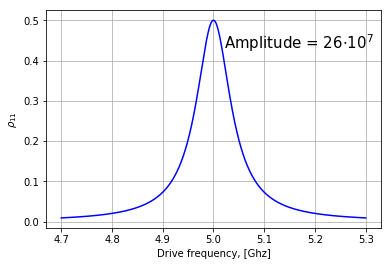

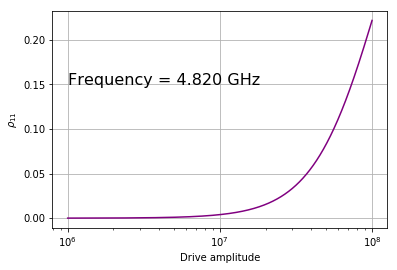

In [5]:
pointf = round(len(Frequency)/5)
point = round(len(Ampl)/4)

    
fig1, ax1 = plt.subplots()
ax1.plot( Frequency/1e9,  Rho11.T[point,:], color="Blue")
ax1.grid(True)
ax1.set_xlabel(r'Drive amplitude')
ax1.set_xlabel('Drive frequency, [Ghz]')
ax1.set_ylabel(r'$\rho_{11}$')
A = Ampl[point]/1e6
plt.text(5.02, 0.43, r'Amplitude = %.f$\cdot 10^{7}$' %A, fontsize=15)


fig, ax = plt.subplots()
ax.grid(True)
ax.set_xscale('log')
ax.plot(Ampl, Rho11.T[:,pointf], color="Purple")
f = Frequency[pointf]/1e9
plt.text(1e6, 0.15, r'Frequency = %.3f GHz' %f, fontsize=16)


ax.set_xlabel(r'Drive amplitude')
ax.set_ylabel(r'$\rho_{11}$')
plt.show()

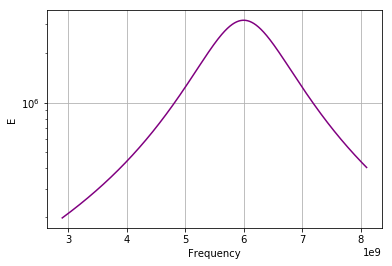

In [6]:
E0 = 1e7

Power = np.zeros(n)
Frequency1 = np.linspace(2.9e9, 8.1e9, n)

def Pow(Frequency): 
    gamma = 8e8
    Power = E0*gamma**2/np.pi/((Frequency - 6e9)**2 + (gamma)**2)
    return Power


fig, ax = plt.subplots()
ax.grid(True)
ax.set_yscale('log')
ax.plot(Frequency1, Pow(Frequency1), color="Purple")

ax.set_xlabel(r'Frequency')
ax.set_ylabel(r'E')

plt.show()

In [7]:
def f_rho11(Fr2, Current):
    E = Pow(Fr2)
    Fi = np.pi * Current * M / Fi0  # поток внешнего поля
    E_J = abs(E_J_max * np.cos(Fi) * sqrt(1 + d ** 2 * tan(Fi) ** 2))
    omega_2tone = Fr2*2*np.pi
    Omega2 = E**2*d2/hbar
    Omega_eg = np.sqrt(8*E_J*E_C) - E_C
    delta = (Omega_eg*2*np.pi - omega_2tone)
    rho11 = Omega2/(2*Omega2+gamma**2+4*delta**2)
    return rho11

def function_S21(Current, tipe):
    f_up =  fr0 + Chi(Current, tipe = '01')/(2*np.pi)#опорная частота постоянно на 0
    f_low = fr0 + Chi(Current, tipe)/(2*np.pi)#частота резонанса
    
    A = amp * exp(1j * alpha) * exp(-2 * pi * 1j * f_up * tau)
    Qdel = (Ql / abs(Qc)) * exp(1j * phi)
    fdel = f_up / f_low - 1
    Z = 1 + 2 * 1j * Ql * fdel
    ideal = 1 - Qdel / Z
    fS21 = A * ideal
    return fS21

def meanS21(Frequency, Current):
    Rho11 = f_rho11(Frequency, Current)
    Rho22 = 1-Rho11
    S1 = function_S21(Current, '0')
    S2 = function_S21(Current, '1')
    S = Rho11*S1 + Rho22*S2
    return S

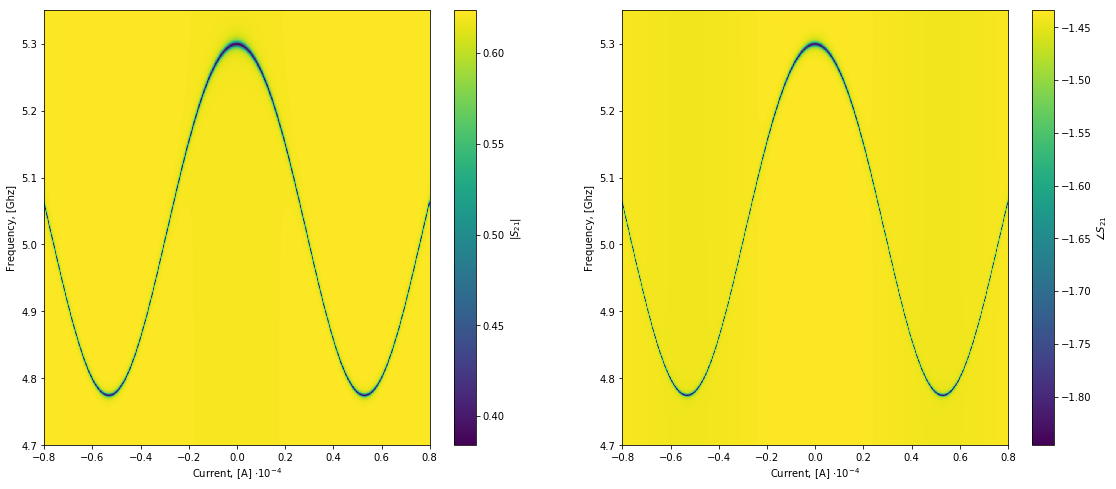

In [8]:
n = 1000

Current = np.linspace(-0.8e-4, 0.8e-4, n)
Frequency = np.linspace(4.7e9, 5.35e9, n)

S21 = np.zeros((n,n))

XX, YY = np.meshgrid(Frequency, Current)
S21abs_r = np.abs(meanS21(XX,YY))
S21arg_r = np.unwrap(np.angle(meanS21(XX,YY)))

fig, ax = plt.subplots(1,2)
fig.set_figwidth(19)    
fig.set_figheight(8)  

ax[0].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[0].set_ylabel('Frequency, [Ghz]')
ax[1].set_xlabel(r'Current, [A] $\cdot 10^{-4}$')
ax[1].set_ylabel('Frequency, [Ghz]')


Abs = ax[0].pcolormesh(Current*1e4, Frequency*1e-9, S21abs_r.T)
Ang = ax[1].pcolormesh(Current*1e4, Frequency*1e-9, S21arg_r.T)
A = fig.colorbar(Abs, ax=ax[0])
B = fig.colorbar(Ang, ax=ax[1])
A.set_label(r'|$S_{21}$|')
B.set_label(r'$\angle S_{21}$')